<a href="https://colab.research.google.com/github/Hashbrownsss/Phishing-URL-detection/blob/main/Random_Forest_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd

input and read training data


In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,mw205674.txt,http://www.danangluxury.com,26,www.danangluxury.com,20.0,0.0,com,75.000000,1.000000,0.522907,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,712147.txt,https://www.leedstownhall.co.uk,30,www.leedstownhall.co.uk,23.0,0.0,uk,100.000000,0.875000,0.028555,...,0.0,0.0,1.0,37.0,41.0,46.0,104.0,3.0,93.0,1.0
2,806061.txt,https://www.mexicancafe.co.nz,28,www.mexicancafe.co.nz,21.0,0.0,nz,100.000000,0.857143,0.001993,...,1.0,0.0,0.0,14.0,4.0,14.0,51.0,0.0,7.0,1.0
3,164934.txt,https://www.usglassmag.com,25,www.usglassmag.com,18.0,0.0,com,100.000000,1.000000,0.522907,...,1.0,0.0,1.0,40.0,26.0,25.0,106.0,9.0,193.0,1.0
4,8131216.txt,https://cloudflare-ipfs.com/ipfs/bafybeicivf4l...,93,cloudflare-ipfs.com,19.0,0.0,com,23.030879,0.733333,0.522907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


df.columns

find for missing values in the dataset


In [ ]:
missing_val = df.isnull().sum()
print(missing_val)

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  1
IsDomainIP                    1
TLD                           1
URLSimilarityIndex            1
CharContinuationRate          1
TLDLegitimateProb             1
URLCharProb                   1
TLDLength                     1
NoOfSubDomain                 1
HasObfuscation                1
NoOfObfuscatedChar            1
ObfuscationRatio              1
NoOfLettersInURL              1
LetterRatioInURL              1
NoOfDegitsInURL               1
DegitRatioInURL               1
NoOfEqualsInURL               1
NoOfQMarkInURL                1
NoOfAmpersandInURL            1
NoOfOtherSpecialCharsInURL    1
SpacialCharRatioInURL         1
IsHTTPS                       1
LineOfCode                    1
LargestLineLength             1
HasTitle                      1
Title                         1
DomainTitleMatchScore         1
URLTitle

fill in missing values in the dataset using the mode of their columns


In [ ]:
df.fillna({col: df[col].mode()[0] for col in df.columns}, inplace=True)

In [ ]:
missing_val = df.isnull().sum()
print(missing_val)

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

Plotting a correlation heatmap to find important features


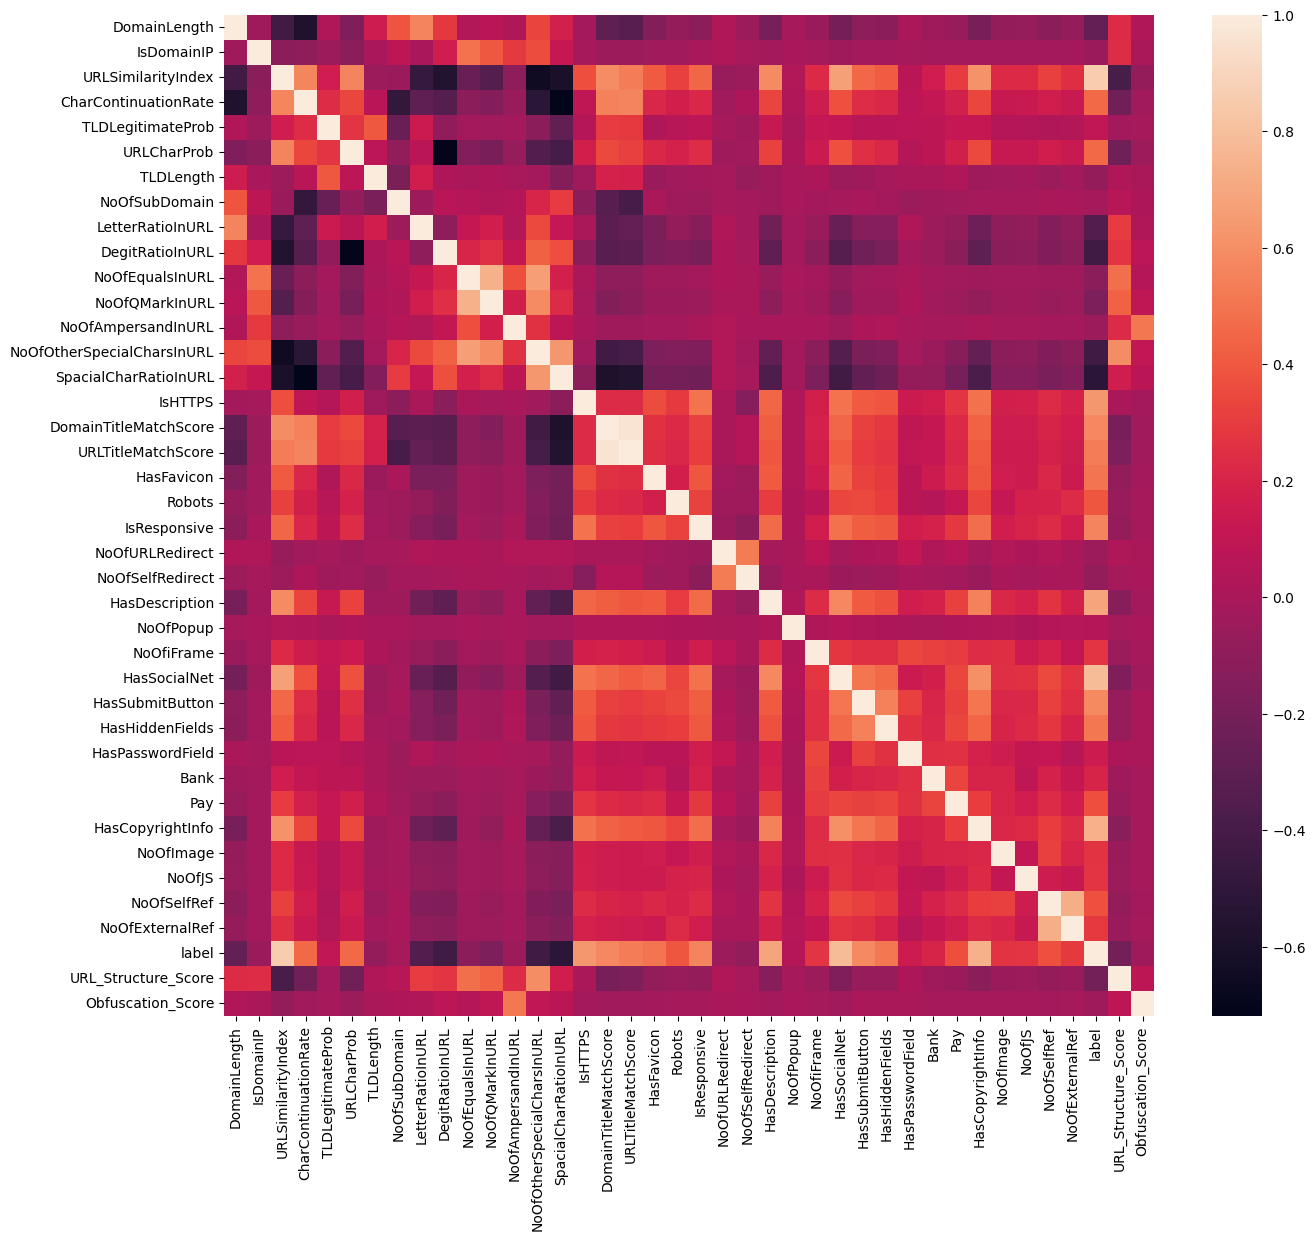

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

combingin columns to reduce reduncdancy and dropping columns of less importance

In [ ]:
df['URL_Structure_Score'] = (df['URLLength'] + df['NoOfDegitsInURL'] + df['NoOfLettersInURL']) / 3
df['Obfuscation_Score'] = df['HasObfuscation'] + df['ObfuscationRatio'] + df['NoOfObfuscatedChar']

drop = ['FILENAME','URL','HasObfuscation','ObfuscationRatio','NoOfObfuscatedChar','URLLength','NoOfDegitsInURL',
        'NoOfLettersInURL' ,'TLD','Domain', 'LineOfCode','Title','HasTitle', 'NoofSubDomain',
        'HasExternalFormSubmit', 'NoOfEmptyRef', 'NoOfCSS','Crypto','LargestLineLength']
df = df.drop(columns = drop, errors = 'ignore')
df.head()

,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,LetterRatioInURL,DegitRatioInURL,...,Bank,Pay,HasCopyrightInfo,NoOfImage,NoOfJS,NoOfSelfRef,NoOfExternalRef,label,URL_Structure_Score,Obfuscation_Score
0,20.0,0.0,75.000000,1.000000,0.522907,0.049839,3.0,1.0,0.538,0.000,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,13.333333,0.0
1,23.0,0.0,100.000000,0.875000,0.028555,0.058238,2.0,2.0,0.533,0.000,...,0.0,0.0,1.0,37.0,46.0,104.0,93.0,1.0,15.333333,0.0
2,21.0,0.0,100.000000,0.857143,0.001993,0.065825,2.0,2.0,0.500,0.000,...,0.0,1.0,0.0,14.0,14.0,51.0,7.0,1.0,14.000000,0.0
3,18.0,0.0,100.000000,1.000000,0.522907,0.058172,3.0,1.0,0.480,0.000,...,0.0,1.0,1.0,40.0,25.0,106.0,193.0,1.0,12.333333,0.0
4,19.0,0.0,23.030879,0.733333,0.522907,0.035517,3.0,0.0,0.742,0.118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.666667,0.0


In [ ]:
df.columns

Index(['DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'LetterRatioInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfJS', 'NoOfSelfRef',
       'NoOfExternalRef', 'label', 'URL_Structure_Score', 'Obfuscation_Score'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['label'])
y = df['label']


for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#rf_model = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=42)       #providing 98% acc on training data. most likely overfit.
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_leaf=10, min_samples_split=10,random_state=42)      # .9988
#rf_model = RandomForestClassifier(n_estimators=30, max_depth=2, min_samples_split=3, max_leaf_nodes =5, random_state=42)   .9985
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test))
print("F1 Score on Training Data: {:.3f}".format(f1_train))
print("F1 Score on Test Data: {:.3f}".format(f1_test))




Random forest: Accuracy on training Data: 1.000
Random forest: Accuracy on test Data: 1.000
F1 Score on Training Data: 1.000
F1 Score on Test Data: 1.000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

k = 5
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

f1_scorer = make_scorer(f1_score, average='weighted')

f1_scores = cross_val_score(rf_model, X, y, cv=stratified_kfold, scoring=f1_scorer)

print("F1 Scores for each fold:", f1_scores)
print("Average F1 Score across folds: {:.4f}".format(f1_scores.mean()))

F1 Scores for each fold: [0.99846676 0.99916363 0.99811795 0.99853626 0.99846654]
Average F1 Score across folds: 0.9986


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for n_estimators and max_depth
# param_grid = {
#     'n_estimators': [10, 50, 100, 200],   # Number of trees in the forest
#     'max_depth': [None, 5, 10, 20],       # Maximum depth of each tree
# }

# # Initialize the RandomForestClassifier
# rf_model = RandomForestClassifier(random_state=42)

# # Use GridSearchCV to test combinations of parameters
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# # Fit the grid search to the data
# grid_search.fit(X, y)

# # Get the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Best F1 Score: 0.9999442463246228


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[12020,     3],
       [    0, 16675]])

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

test_df = pd.read_csv('/content/test.csv')

test_df.head()

filename = test_df['FILENAME']

test_df['URL_Structure_Score'] = (test_df['URLLength'] + test_df['NoOfDegitsInURL'] + test_df['NoOfLettersInURL']) / 3
test_df['Obfuscation_Score'] = test_df['HasObfuscation'] + test_df['ObfuscationRatio'] + test_df['NoOfObfuscatedChar']

drop_columns = ['FILENAME', 'URL', 'HasObfuscation', 'ObfuscationRatio', 'NoOfObfuscatedChar',
                'URLLength', 'NoOfDegitsInURL', 'NoOfLettersInURL', 'TLD', 'Domain',
                'LineOfCode', 'Title', 'HasTitle', 'NoofSubDomain',
                'HasExternalFormSubmit', 'NoOfEmptyRef', 'NoOfCSS', 'Crypto',
                'LargestLineLength']
X_test = test_df.drop(columns=drop_columns, errors='ignore')

for column in test_df.columns:
    if test_df[column].dtype == 'object':
        le = LabelEncoder()
        test_df[column] = le.fit_transform(test_df[column])

y_pred = rf_model.predict(X_test)

results_df = pd.DataFrame({
    'FILENAME': filename,
    'label': y_pred
})

results_df['label'] = results_df['label'].astype(int)

results_df.to_csv('results.csv', index=False)
